# K-Means clustering

In this notebook, we are going to look at how to do K-Means clustering in Python using Scikit-learn and other modules. Let us import the usual modules as well the `KMeans` model from Scikit-learn

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

As example data, we will use some age and income data. The data is example data from the book ["Introduction to R for Business Intelligence"](https://jgendron.github.io/com.packtpub.intro.r.bi/), Packt Publishing Ltd., 2016, by Jay Gendron. The dataset is also on Moodle and can be loaded in by:

In [23]:
data = pd.read_csv("Ch5_age_income_data.csv")
data.head()

,bin,age,income
0,60-69,64,87083.236510
1,30-39,33,76807.824635
2,20-29,24,12043.598766
3,30-39,33,61972.002432
4,70-79,78,60120.315192


For our clustering, we will select only the `age` and the `income` variables:

In [24]:
X = data[['age', 'income']]

Here is an example of how to run K-Means clustering using `KMeans` with $K=3$:

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

After calling the **fit()** function, the clustering is done, as it is *unsupervised* learning. The clustering result is stored in an array called **labels_**. It stores a cluster label for each data point in X.

In [26]:
kmeans.labels_

array([1, 2, 0, ..., 0, 0, 1], shape=(8105,), dtype=int32)

Each cluster's center (/centroid) is also stored, in another array called **cluster_centers_**:

In [27]:
kmeans.cluster_centers_

array([[4.24121406e+01, 3.64331081e+04],
       [3.81618954e+01, 1.03016430e+05],
       [4.61336603e+01, 6.90983087e+04]])

Let us now visualize the result of the clustering. To do this easily with Seaborn, we first a column with assigned cluster to the dataset:

In [28]:
data["3MeansCluster"] = kmeans.labels_

We can now plot the points of X together with their associated cluster and the cluster centroids:

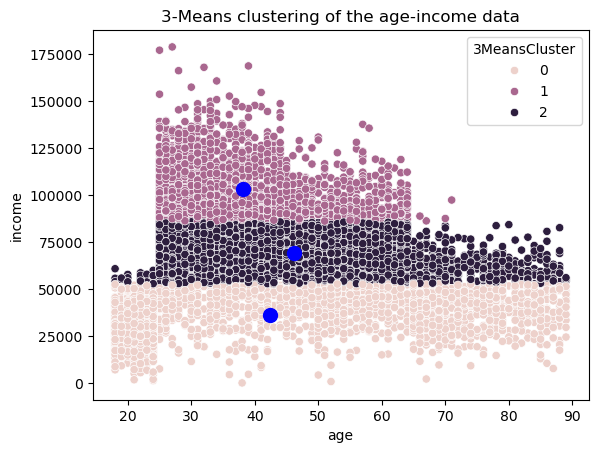

In [29]:
sns.scatterplot(data = data, x = "age", y = "income", hue = "3MeansCluster")
plt.scatter(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], color='blue', s = 100)
plt.title("3-Means clustering of the age-income data")
plt.show()

From the plot above we can see the data is not really clustered based on the two columns of Age and Income. It is only done on the Income that dominates the distance calculation. Therefore, we need to apply data scaling before we do clustering appropriately.

### Data Scaling

In [30]:
minMaxScaler = MinMaxScaler()
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)

We can now build the 3-means clustering model again:

In [31]:
kmeans_scaled = KMeans(n_clusters=3)
kmeans_scaled.fit(X_scaled_mm)

KMeans(n_clusters=3)

Let us visualize clustering with the scaling also:

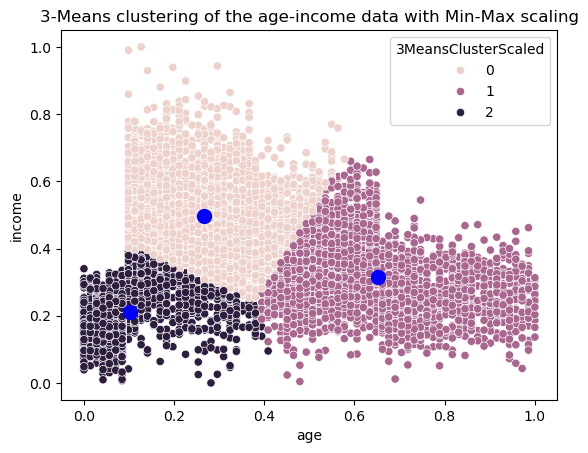

In [32]:
data_scaled = X_scaled_mm.copy()
data_scaled["3MeansClusterScaled"] = kmeans_scaled.labels_

sns.scatterplot(data = data_scaled, x = "age", y = "income", hue = "3MeansClusterScaled")
plt.scatter(x = kmeans_scaled.cluster_centers_[:,0], y = kmeans_scaled.cluster_centers_[:,1], color='blue', s = 100)
plt.title("3-Means clustering of the age-income data with Min-Max scaling")
plt.show()

If we want a plot of the point that are not scaled, we can simply add the clustering information to the original dataset `data` as before:

In [33]:
data["3MeansClusterScaled"] = kmeans_scaled.labels_

However, our cluster centroids are scalled, so we need to rescale them to plot those also:

In [34]:
centroids = minMaxScaler.inverse_transform(kmeans_scaled.cluster_centers_)

We can now plot the unscaled data with the clusters generated from the scaled data:

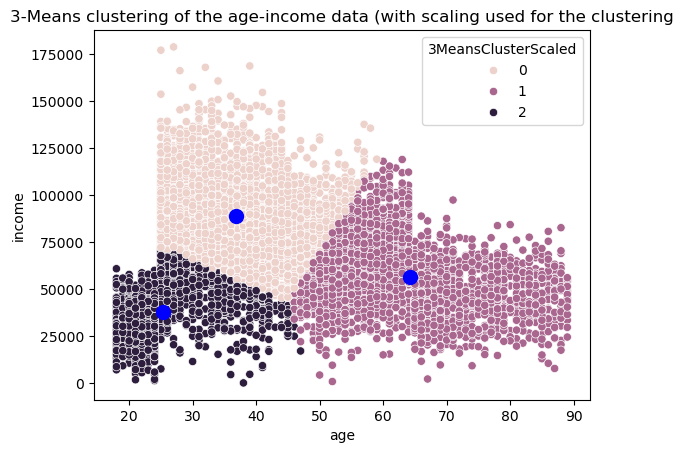

In [35]:
sns.scatterplot(data = data, x = "age", y = "income", hue = "3MeansClusterScaled")
plt.scatter(x = centroids[:,0], y = centroids[:,1], color='blue', s = 100)
plt.title("3-Means clustering of the age-income data (with scaling used for the clustering")
plt.show()

### The Elbow Method

We can try different K values and plot the SSEs for all of them. From the plot, we can choose the Elbow Point, i.e., the best K.

We generate a series K-Means models by varying K from 1 to 20. A model's variable **inertia_** stores the overall SSE (sum of squared error) for the model.

In [36]:
errors = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled_mm)
    errors.append(kmeanModel.inertia_)

We plot the (K, SSE) pairs for all Ks:

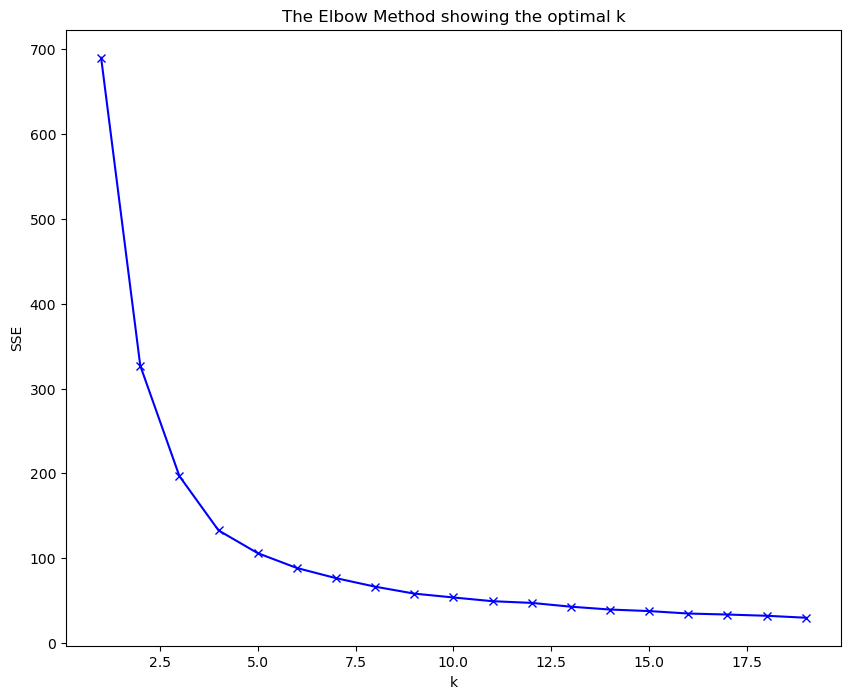

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(K, errors, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Let's take a closer look by printing out the SSE decrease for each K:

In [38]:
for i in range(1, len(errors)):
    print('K={0}: {1}'.format(i+1, errors[i-1] - errors[i]))

K=2: 363.21336016677554
K=3: 130.3018691345763
K=4: 63.99218234859231
K=5: 26.811590245754402
K=6: 17.4933846161007
K=7: 11.984895047372248
K=8: 10.05070226782503
K=9: 8.196505309655826
K=10: 4.546209718881478
K=11: 4.399991702386195
K=12: 2.0055499737780877
K=13: 4.4642365568488245
K=14: 3.3600679935151803
K=15: 1.80254905860032
K=16: 2.911617938986282
K=17: 1.1853509030102671
K=18: 1.4498211503242047
K=19: 2.3036889952926707


In this case, it looks like we should choose K=5, 6, or 7.

Let us try with k=7, for instance:

In [39]:
kmeans_scaled7 = KMeans(n_clusters=7)
kmeans_scaled7.fit(X_scaled_mm)

data["7MeansClusterScaled"] = kmeans_scaled7.labels_
centroids7 = minMaxScaler.inverse_transform(kmeans_scaled7.cluster_centers_)

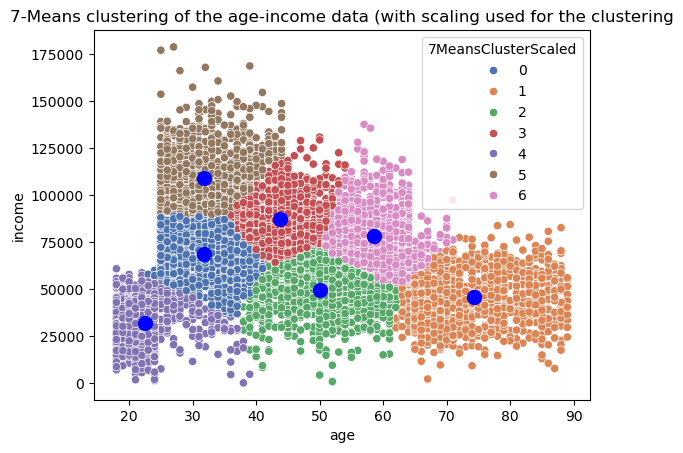

In [40]:
sns.scatterplot(data = data, x = "age", y = "income", hue = "7MeansClusterScaled", palette="deep")
plt.scatter(x = centroids7[:,0], y = centroids7[:,1], color='blue', s = 100)
plt.title("7-Means clustering of the age-income data (with scaling used for the clustering")
plt.show()